*NOTE: In the TL,DR, optimize for **clarity** and **comprehensiveness**. The goal is to convey the post with the least amount of friction, especially since ipython/beakers require much more scrolling than blog posts. Make the reader get a correct understanding of the post's takeaway, and the points supporting that takeaway without having to strain through paragraphs and tons of prose. Bullet points are great here, but are up to you. Try to avoid academic paper style abstracts.*

 - Having a specific title will help avoid having someone browse posts and only finding vague, similar sounding titles
 - Having an itemized, short, and clear tl,dr will help readers understand your content
 - Setting the reader's context with a motivation section makes someone understand how to judge your choices
 - Visualizations that can stand alone, via legends, labels, and captions are more understandable and powerful


### Motivation

*NOTE: optimize in this section for **context setting**, as specifically as you can. For instance, this post is generally a set of standards for work in the repo. The specific motivation is to have least friction to current workflow while being able to painlessly aggregate it later.*

The knowledge repo was created to consolidate research work that is currently scattered in emails, blogposts, and presentations, so that people didn't redo their work.

### Putting Big Bold Headers with Clear Takeaways Will Help Us Aggregate Later

In [1]:
import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt
from moztelemetry.dataset import Dataset
from moztelemetry import get_pings_properties, get_one_ping_per_client

Unable to parse whitelist (/home/hadoop/anaconda2/lib/python2.7/site-packages/moztelemetry/histogram-whitelists.json). Assuming all histograms are acceptable.


The goal of this example is to determine if Firefox has a similar startup time distribution on all Operating Systems. Let's start by fetching 10% of Telemetry submissions for a given submission date...

In [2]:
Dataset.from_source("telemetry").schema

[u'submissionDate',
 u'sourceName',
 u'sourceVersion',
 u'docType',
 u'appName',
 u'appUpdateChannel',
 u'appVersion',
 u'appBuildId']

In [3]:
pings = Dataset.from_source("telemetry") \
    .where(docType='main') \
    .where(submissionDate="20161101") \
    .where(appUpdateChannel="nightly") \
    .records(sc, sample=0.1)

... and extract only the attributes we need from the Telemetry submissions:

In [4]:
subset = get_pings_properties(pings, ["clientId",
                                      "environment/system/os/name",
                                      "payload/simpleMeasurements/firstPaint"])

To prevent pseudoreplication, let's consider only a single submission for each client. As this step requires a distributed shuffle, it should always be run only after extracting the attributes of interest with *get_pings_properties*.

In [5]:
subset = get_one_ping_per_client(subset)

Let's group the startup timings by OS:

In [6]:
grouped = subset.map(lambda p: (p["environment/system/os/name"], p["payload/simpleMeasurements/firstPaint"])).groupByKey().collectAsMap()

And finally plot the data:

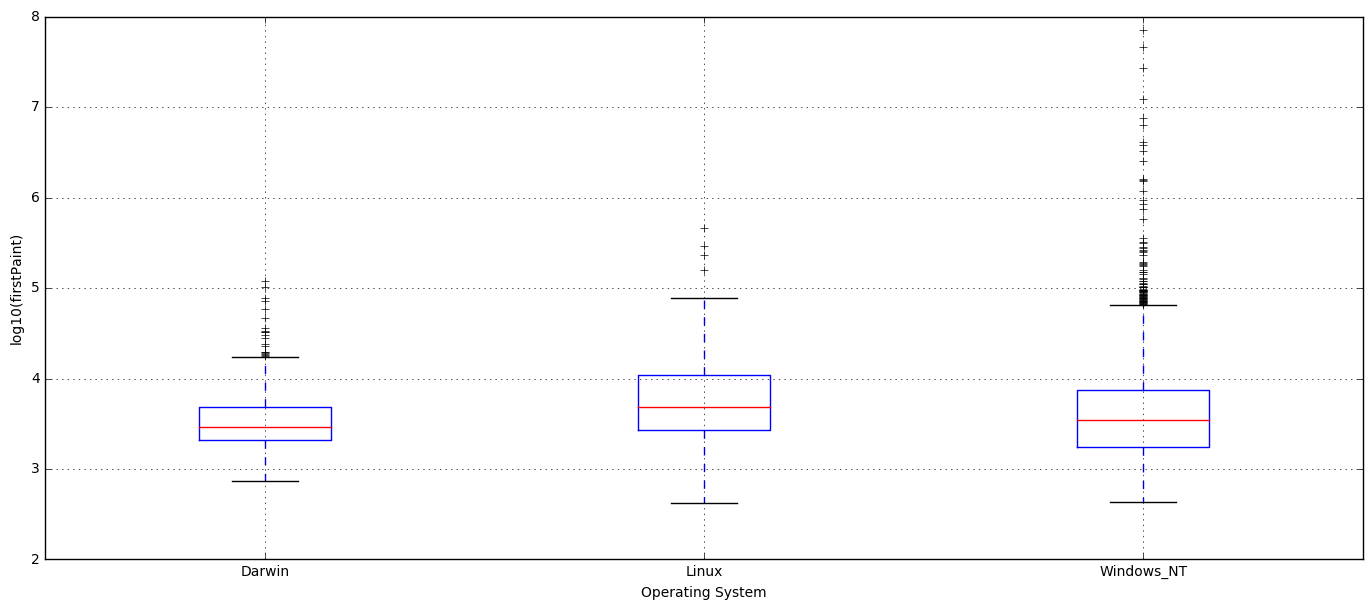

In [7]:
frame = pd.DataFrame({x: np.log10(pd.Series(list(y))) for x, y in grouped.items()})
plt.figure(figsize=(17, 7))
frame.boxplot(return_type="axes")
plt.ylabel("log10(firstPaint)")
plt.xlabel("Operating System")
plt.show()

*NOTE: in graphs, optimize for being able to **stand alone**. Put enough labeling in your graph to be understood on its own. When aggregating and putting things in presentations, you won't have to recreate and add code to each plot to make it understandable without the entire post around it. Will it be understandable without several paragraphs?*

### Appendix

Put all the stuff here that is not necessary for supporting the points above. Good place for documentation without distraction.